In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

In [134]:
#loading the dataset
original_data = pd.read_csv("bank-full.csv", sep=";")

### Understanding the data

In [4]:
#print the 5 first value
original_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#print descriptive statistics
original_data.describe()
# We observe some extreme maximum values and high standard deviation values
# which will be further investigated

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# print additional info about the type of data
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Check for null and Nan and None values
original_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
# Looking through the data points alternativelly marked as missing values
print('\nJobs: ', original_data.job.unique())
print('\nMarital status: ', original_data.marital.unique())
print('\nEducation: ', original_data.education.unique())
print('\nCredit in default: ', original_data.default.unique())
print('\nHousing loan: ', original_data.housing.unique())
print('\nPersonal loan: ', original_data.loan.unique())
print('\nContact channel: ', original_data.contact.unique())
print('\nMonth: ', original_data.month.unique())
print('\nPrevious campaign outcome: ', original_data.poutcome.unique())
print('\nDefault: ', original_data.default.unique())


Jobs:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Marital status:  ['married' 'single' 'divorced']

Education:  ['tertiary' 'secondary' 'unknown' 'primary']

Credit in default:  ['no' 'yes']

Housing loan:  ['yes' 'no']

Personal loan:  ['no' 'yes']

Contact channel:  ['unknown' 'cellular' 'telephone']

Month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Previous campaign outcome:  ['unknown' 'failure' 'other' 'success']

Default:  [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 12

In [9]:
# Potential missing values
print('\nUnknown values in job: ', (original_data.job == 'unknown').sum())
print('\nUnknown values in education: ', (original_data.education == 'unknown').sum())
print('\nUnknown values in contact: ', (original_data.contact == 'unknown').sum())
print('\nUnknown values in poutcome: ', (original_data.poutcome == 'unknown').sum())


Unknown values in job:  288

Unknown values in education:  1857

Unknown values in contact:  13020

Unknown values in poutcome:  36959


In [11]:
### we want to know how much missing values there is

original_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [71]:
original_data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
original_data['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [13]:
original_data['poutcome'].value_counts()
print(36959/len(original_data.poutcome))

#81 % of the data are unknown. We may delete this column

0.8174780473778506


In [29]:
original_data['pdays'].value_counts()
print(36954/len(original_data.pdays))

0.8173674548229414


In [14]:
original_data['contact'].value_counts()
# this is not a feature we are interested in. 
# contact communication type (categorical: "unknown","telephone","cellular") 

# we may delete this column

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [135]:
# Create new feature: Prev_contact (if the client has been contacted or not before this campaign)
prev_contact = np.array(original_data.pdays)
with np.nditer(prev_contact, op_flags=['readwrite']) as it:
    for x in it:
        if x == -1:
            x[...] = 0
        else:
            x[...] = 1
original_data['prev_contacted'] = prev_contact.tolist()

In [75]:
# Ensuring there no unnatural values
if(original_data.age.any() < 0 or original_data.age.any() > 100):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.day.any() < 1 or original_data.age.any() > 31):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.duration.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.campaign.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.previous.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.pdays.any() < 0 and original_data.pdays.any() != -1):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')


Good data!

Good data!

Good data!

Good data!

Good data!

Good data!


### At this stage we should delete contact and poutcome

In [136]:
original_data = original_data.drop(['contact','poutcome', 'pdays'], axis=1)

### Visualisation

Text(0.5, 1.0, 'Marital status')

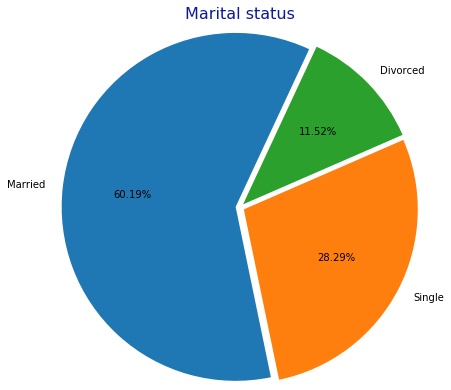

In [59]:
pie_array = np.zeros(3, dtype = int)
pie_array[0] = sum(original_data.marital == 'married')
pie_array[1] = sum(original_data.marital == 'single')
pie_array[2] = sum(original_data.marital == 'divorced')
#print(pie_array[::])
plt.pie(pie_array, radius = 2, startangle = 65.0, labels = ['Married', 'Single', 'Divorced'], explode = [0.05, 0.05, 0.05], autopct='%1.2f%%')
plt.axis = 'equal'
plt.title('Marital status', pad = 80.0, color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Levels of education')

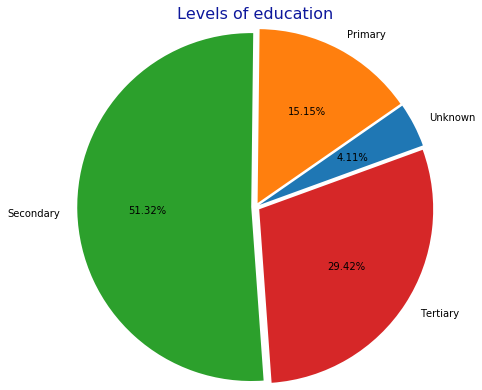

In [55]:
pie_array = np.zeros(4, dtype = int)
pie_array[0] = sum(original_data.education == 'unknown')
pie_array[1] = sum(original_data.education == 'primary')
pie_array[2] = sum(original_data.education == 'secondary')
pie_array[3] = sum(original_data.education == 'tertiary')
#print(pie_array[::])
plt.pie(pie_array, radius = 2, startangle = 20.0, labels = ['Unknown', 'Primary', 'Secondary', 'Tertiary'], explode = [0.05, 0.05, 0.05, 0.05], autopct='%1.2f%%')
plt.axis = 'equal'
plt.title('Levels of education', pad = 80.0, color = '#0E189C', fontdict = {'fontsize':16})

[13020 29285  2906]


Text(0.5, 1.0, 'Contact method')

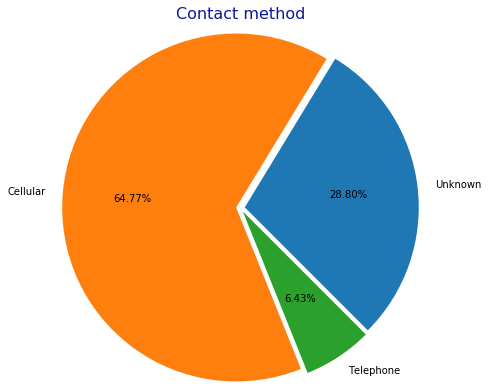

In [49]:
pie_array = np.zeros(3, dtype = int)
pie_array[0] = sum(original_data.contact == 'unknown')
pie_array[1] = sum(original_data.contact == 'cellular')
pie_array[2] = sum(original_data.contact == 'telephone')
print(pie_array[::])
plt.pie(pie_array, radius = 2, startangle = -45.0, labels = ['Unknown', 'Cellular', 'Telephone'], explode = [0.05, 0.05, 0.05], autopct='%1.2f%%')
plt.axis = 'equal'
plt.title('Contact method', pad = 80.0, color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Previous campaign outcome')

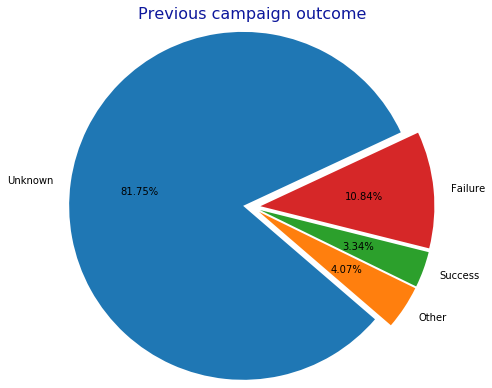

In [57]:
pie_array = np.zeros(4, dtype = int)
pie_array[0] = sum(original_data.poutcome == 'unknown')
pie_array[1] = sum(original_data.poutcome == 'other')
pie_array[2] = sum(original_data.poutcome == 'success')
pie_array[3] = sum(original_data.poutcome == 'failure')
#print(pie_array[::])
plt.pie(pie_array, radius = 2, startangle = 25.0, labels = ['Unknown', 'Other', 'Success', 'Failure'], explode = [0.1, 0.1, 0.1, 0.1], autopct='%1.2f%%')
plt.axis = 'equal'
plt.title('Previous campaign outcome', pad = 80.0, color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Overview of balance related to occupation')

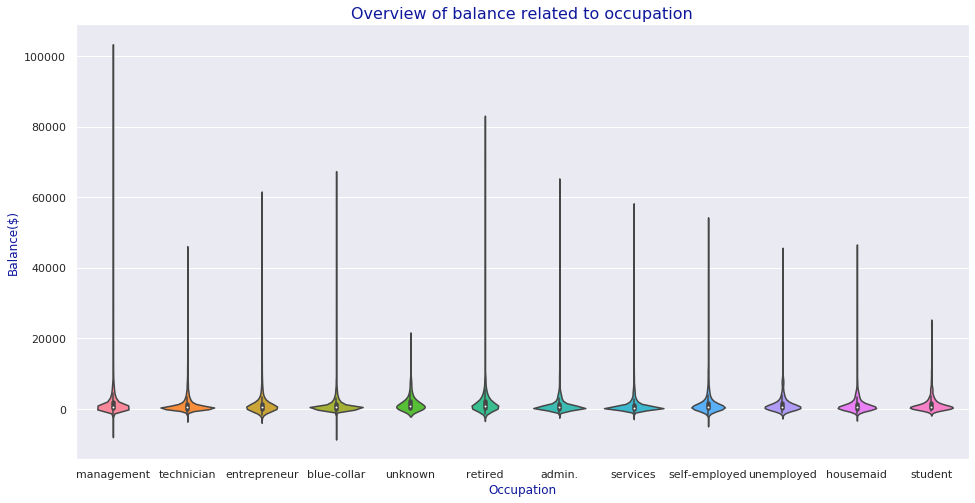

In [61]:
sns.set()
plt.figure(figsize = [16,8])
ax = sns.violinplot(y=original_data.balance, x=original_data.job, saturation = 1)
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Occupation', color = '#0E189C')
ax.set_title('Overview of balance related to occupation', color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Overview of contact duration related to month')

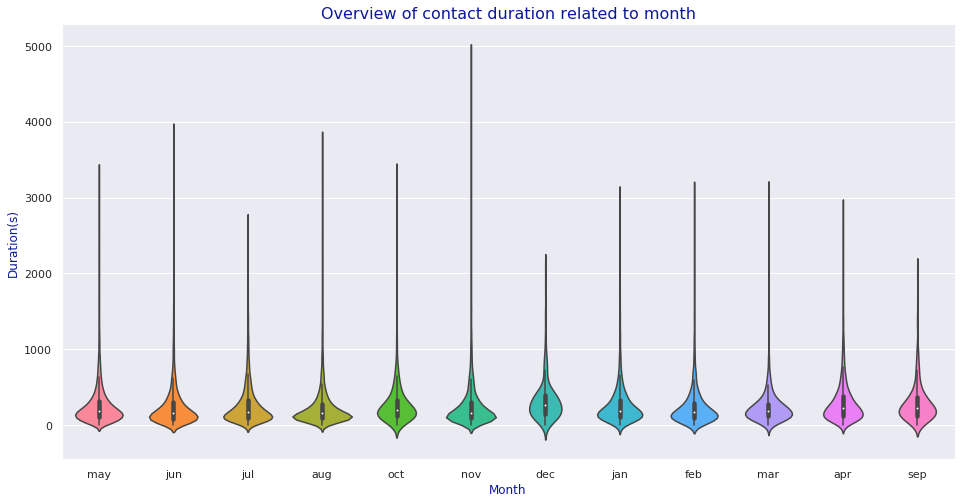

In [24]:
sns.set()
plt.figure(figsize = [16,8])
ax = sns.violinplot(y=original_data.duration, x=original_data.month, saturation = 1)
ax.set_ylabel('Duration(s)', color= '#0E189C')
ax.set_xlabel('Month', color = '#0E189C')
ax.set_title('Overview of contact duration related to month', color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 0, 'Default credit')

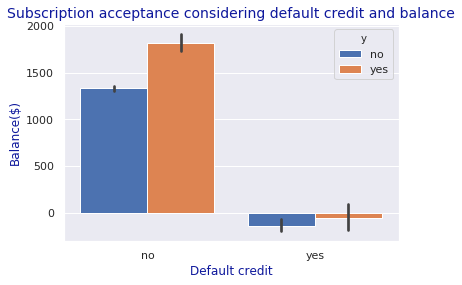

In [28]:
sns.set_style()
ax = sns.barplot(y = original_data.balance, x = original_data.default, hue = original_data.y, saturation = 1)
ax.set_title('Subscription acceptance considering default credit and balance', color = '#0E189C', fontdict = {'fontsize':14})
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Default credit', color = '#0E189C')

Text(0.5, 0, 'Housing loan')

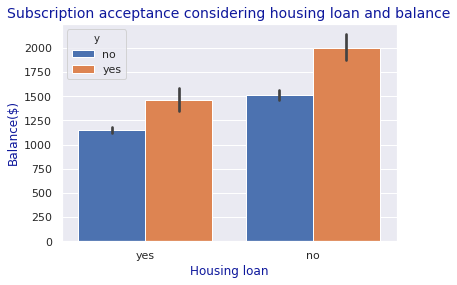

In [29]:
sns.set()
ax = sns.barplot(x = original_data.housing, y = original_data.balance, hue = original_data.y, saturation = 1)
ax.set_title('Subscription acceptance considering housing loan and balance', color = '#0E189C', fontdict = {'fontsize':14})
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Housing loan', color = '#0E189C')

Text(0.5, 0, 'Personal loan')

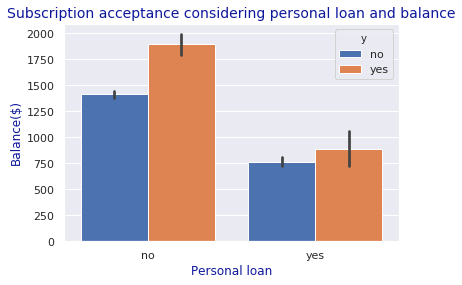

In [30]:
sns.set()
ax = sns.barplot(x = original_data.loan, y = original_data.balance, hue = original_data.y, saturation = 1)
ax.set_title('Subscription acceptance considering personal loan and balance', color = '#0E189C', fontdict = {'fontsize':14})
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Personal loan', color = '#0E189C')

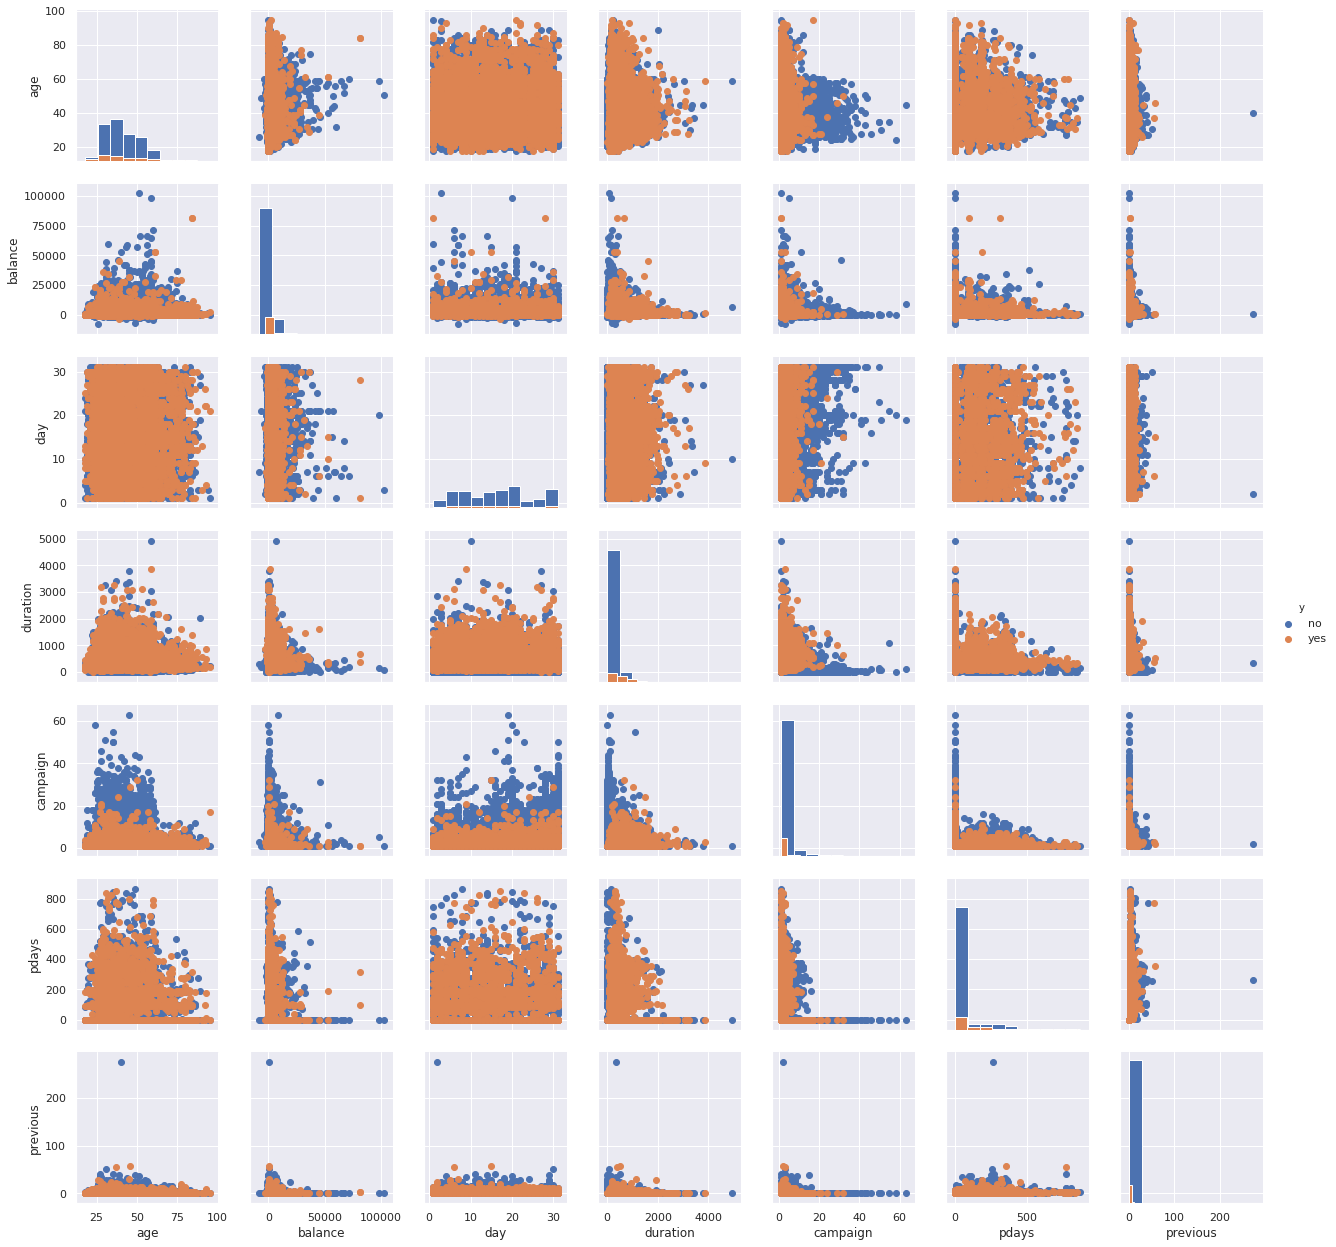

In [45]:
g = sns.PairGrid(original_data, hue='y')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [1]:
# Count plot of 'age' feature
sns.set(style = 'darkgrid')
ax = sns.distplot(original_data.age, kde = False, color = '#FF3A03')
ax.set_title('Age Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color= '#0E189C')
ax.set_xlabel('Age', color = '#0E189C')

NameError: name 'sns' is not defined

7168


Text(0.5,0,'Balance($)')

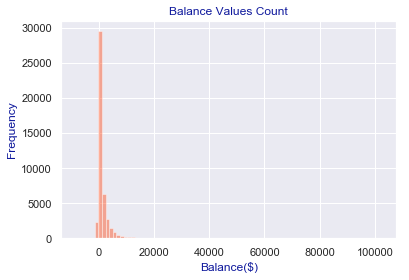

In [78]:
# Count plot of 'balance' feature
# Find how many data points are, to know how many bins to create
balance_array = original_data.balance.unique()
print(len(balance_array))
# Plot histogram
sns.set()
ax1 = sns.distplot(original_data.balance, bins = 84, kde = False, color = '#FF3A03')
ax1.set_title('Balance Values Count', color = '#0E189C')
ax1.set_ylabel('Frequency', color = '#0E189C')
ax1.set_xlabel('Balance($)', color = '#0E189C')

6988


Text(0.5,0,'Balance($)')

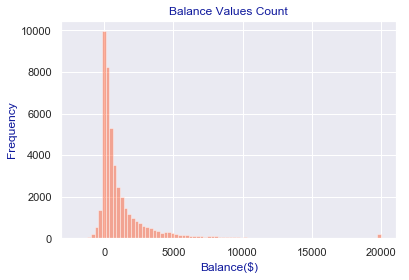

In [79]:
# Outliers in balance
copy_2 = original_data
copy_1 = copy_2
copy_1.balance = copy_1.balance.where(copy_1.balance < 20000, other = 20000)
copy_1.balance = copy_1.balance.where(copy_1.balance > -2000, other = -2000)
balance_array = copy_1.balance.unique()
print(len(balance_array))
sns.set()
ax = sns.distplot(copy_1.balance, bins = 84, kde = False, color = '#FF3A03')
ax.set_title('Balance Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Balance($)', color = '#0E189C')

Text(0.5,0,'Balance($)')

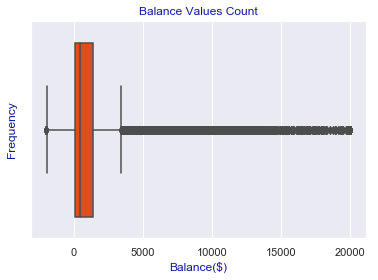

In [80]:
sns.set()
ax = sns.boxplot(copy_1.balance, color = '#FF3A03')
ax.set_title('Balance Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Balance($)', color = '#0E189C')

1573


Text(0.5,0,'Duration(s)')

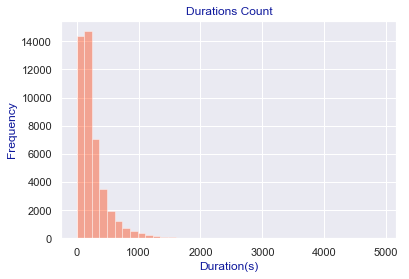

In [81]:
# Count plot of 'duration' feature
# Find how many data points are, to know how many bins to create
duration_array = original_data.duration.unique()
print(len(duration_array))
# Plot histogram
sns.set(style = 'darkgrid')
ax = sns.distplot(original_data.duration, bins = 40, kde = False, color = '#FF3A03')
ax.set_title('Durations Count', color = '#0E189C')
ax.set_ylabel('Frequency', color= '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

1517


Text(0.5,0,'Duration(s)')

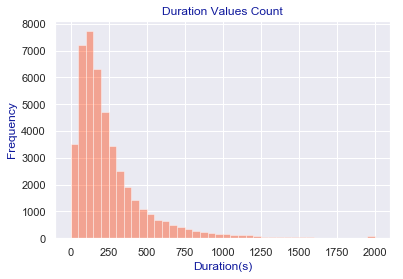

In [82]:
# Outliers in duration
copy_2 = original_data
copy_1 = copy_2
copy_1.duration = copy_1.duration.where(copy_1.duration < 2000, other = 2000)
balance_array = copy_1.duration.unique()
print(len(balance_array))
sns.set()
ax = sns.distplot(copy_1.duration, bins = 40, kde = False, color = '#FF3A03')
ax.set_title('Duration Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

Text(0.5,0,'Duration(s)')

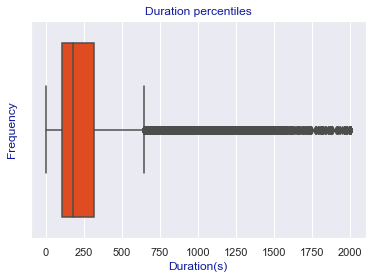

In [83]:
sns.set()
ax = sns.boxplot(copy_1.duration, color = '#FF3A03')
ax.set_title('Duration percentiles', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

Text(0.5,0,'campaign')

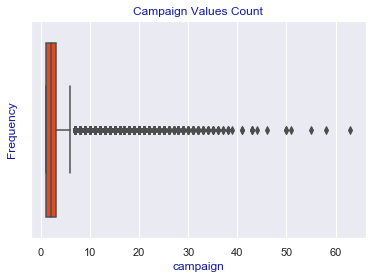

In [84]:
sns.set()
ax = sns.boxplot(copy_1.campaign, color = '#FF3A03')
ax.set_title('Campaign Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('campaign', color = '#0E189C')

Text(0.5,0,'Previous')

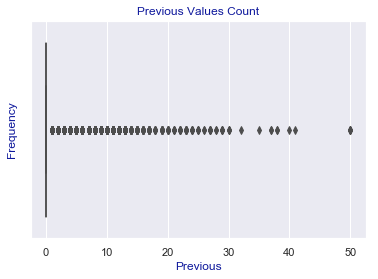

In [85]:
copy_1.previous = copy_1.previous.where(copy_1.previous < 50, other = 50)
sns.set()
ax = sns.boxplot(copy_1.previous, color = '#FF3A03')
ax.set_title('Previous Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Previous', color = '#0E189C')

Text(0.5,0,'Pdays')

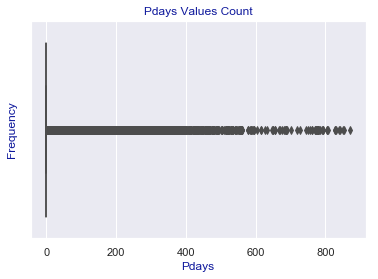

In [86]:
sns.set()
ax = sns.boxplot(copy_1.pdays, color = '#FF3A03')
ax.set_title('Pdays Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Pdays', color = '#0E189C')

In [148]:
#data transformation. From categorical to numerical value

le = preprocessing.LabelEncoder()
le.fit(original_data['job'])
original_data['job'] = (le.transform(original_data['job']))
x = [x for x in range(len(set(original_data['job'])))]
print(x,le.inverse_transform(x) )

le.fit(original_data['marital'])
original_data['marital'] = (le.transform(original_data['marital']))

le.fit(original_data['education'])
original_data['education'] = (le.transform(original_data['education']))

le.fit(original_data['default'])
original_data['default'] = (le.transform(original_data['default']))

le.fit(original_data['housing'])
original_data['housing'] = (le.transform(original_data['housing']))

le.fit(original_data['loan'])
original_data['loan'] = (le.transform(original_data['loan']))


le.fit(original_data['month'])
original_data['month'] = (le.transform(original_data['month']))


le.fit(original_data['y'])
original_data['y'] = (le.transform(original_data['y']))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


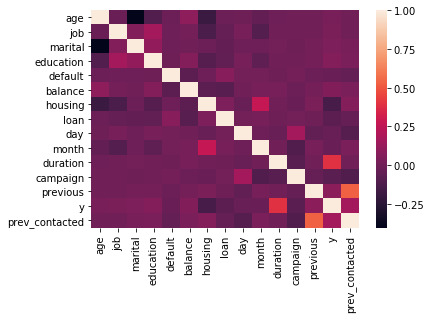

In [107]:
corr =original_data.corr(method = 'pearson')
sns.heatmap(corr)

In [141]:
### we want to know the repartition of the class
print(original_data.y.value_counts())

no     39922
yes     5289
Name: y, dtype: int64


In [142]:
print("proportion of classes:\n", original_data.y.value_counts()/len(original_data.y))

proportion of classes:
 no     0.883015
yes    0.116985
Name: y, dtype: float64


### we have to prepare our data set and divide into training and test

The first group of data will have the same proportion as the data

The second group of data will be balanced in terms of output variable

In [149]:
# we need to differenciate the output and input variable

x = original_data.iloc[:,:-1]
y = original_data.iloc[:,-1]

In [150]:
# This one will have the same proportion as the original dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)




In [151]:
C1= original_data[original_data['y']==1]
C0 = original_data[original_data['y']==0].sample(n=len(C1), random_state=0)
data_balanced = pd.concat([C0, C1])
x1 = data_balanced.iloc[:,:-1]
y1 = data_balanced.iloc[:,-1]

#This one will be balanced
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33)


data_balanced.describe()


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,prev_contacted
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.316884,4.502269,1.197580,1.284836,0.013330,1530.914067,0.473435,0.130459,15.539894,5.467952,379.122802,2.508130,0.854509,0.500000,0.261108
std,11.989555,3.258206,0.628125,0.745145,0.114687,3218.291508,0.499317,0.336824,8.389991,3.194990,349.839787,2.731116,2.287155,0.500024,0.439259
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3372.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,117.000000,0.000000,0.000000,8.000000,3.000000,144.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,547.000000,0.000000,0.000000,15.000000,6.000000,260.000000,2.000000,0.000000,0.500000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1718.000000,1.000000,0.000000,21.000000,8.000000,506.000000,3.000000,1.000000,1.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,11.000000,3881.000000,44.000000,58.000000,1.000000,1.000000


In [152]:
#### SANDARDIZE THE DATA ########
#### SANDARDIZE THE DATA ########
#preprocessing.StandardScaler().fit(X_train)
X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)


X_train1 = preprocessing.StandardScaler().fit_transform(X_train1)
X_test1 = preprocessing.StandardScaler().fit_transform(X_test1)


In [153]:
# We know that we have enough data to keep all the features 
#but we still want to try a pca algoritmh to not repeat variables

In [154]:

pca = PCA(.95)
pca.fit(X_train1)
X_train1_new = pca.transform(X_train1)
X_test1_new = pca.transform(X_test1)
pca.explained_variance_ratio_
#we can see with the explained variance ratio that there is not  
# principal component and all the data seems essential

array([0.12069812, 0.10989378, 0.09601851, 0.08442976, 0.07613511,
       0.07174313, 0.06904942, 0.06593324, 0.0639075 , 0.06206763,
       0.05961335, 0.0538214 , 0.03540398])

### We start classifying

In [155]:
### we will need a function to plot the ROC function

def ROC(test, prediction):
    
    n = len(prediction)
    

    TP = []
    TN = []
    FP = []
    FN = []

    #initialize

    if ((prediction[0]==0) and (test.iloc[0]==0)):
        TP.append((1))
        TN.append(0)
        FP.append(0)
        FN.append(0)
    if ((prediction[0]==0) and (test.iloc[0]==1)):
        TP.append(0)
        TN.append(0)
        FP.append(0)
        FN.append(1)
    if ((prediction[0]==1) and (test.iloc[0]==0)):
        TP.append(0)
        TN.append(0)
        FP.append(1)
        FN.append(0)
    if ((prediction[0]==1) and (test.iloc[0]==1)):
        TP.append(0)
        TN.append(1)
        FP.append(0)
        FN.append(0)

    for k in range(1,n-1):
        
        if ((prediction[k]==0) and (test.iloc[k]==0)):
            TP.append((TP[k-1]+1))
            TN.append(TN[k-1]+0)
            FP.append(FP[k-1]+0)
            FN.append(FN[k-1]+0)

        if ((prediction[k]==0) and (test.iloc[k]==1)):
            TP.append((TP[k-1]+0))
            TN.append(TN[k-1]+0)
            FP.append(FP[k-1]+0)
            FN.append(FN[k-1]+1)
        if ((prediction[k]==1) and (test.iloc[k]==0)):
            TP.append((TP[k-1]+0))
            TN.append(TN[k-1]+0)
            FP.append(FP[k-1]+1)
            FN.append(FN[k-1]+0)
        if ((prediction[k]==1) and (test.iloc[k]==1)):
            TP.append((TP[k-1]+0))
            TN.append(TN[k-1]+1)
            FP.append(FP[k-1]+0)
            FN.append(FN[k-1]+0)



    TP = np.asarray(TP)
    TN = np.asarray(TN)
    FP = np.asarray(FP)
    FN = np.asarray(FN)

    TP = TP/TP[-1]
    FP= FP/FP[-1]
    
    
    plt.figure()
    plt.title('ROC curve')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.plot(FP,TP)
    
    return None

### First algorithm of KNeighbors with the unbalanced data

In [156]:
### Kneighboor classifier

#We can try to find the optimal number of neighbors because its is not very complex to compute and calculate

for k in range(1,5):
        
    neigh = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', p=2)
    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)

    print("Accuracy with ",k, "neighbors " ,metrics.accuracy_score(y_test, y_pred))

### there is no need to change the value of k

neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

confusion_matrix(y_test,y_pred)


Accuracy with  1 neighbors  0.9290214477211797
Accuracy with  2 neighbors  0.9272117962466488
Accuracy with  3 neighbors  0.932573726541555
Accuracy with  4 neighbors  0.9270107238605898
Accuracy: 0.9331769436997319


array([[12169,    95],
       [  902,  1754]])

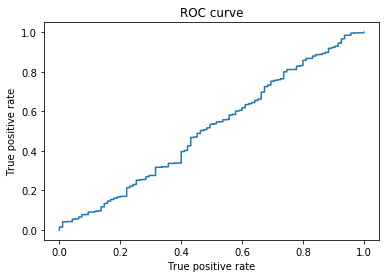

In [157]:
#We can plot the roc curve for k=5
ROC(y_test, y_pred)

In [ ]:
#the model is not good and if we look at the confusion matrix it makes too many mistakes

### Kneigbors algorithm with the balance dataset

In [119]:
### Kneighboor classifier


neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)
neigh.fit(X_train1, y_train1)

y_pred1 = neigh.predict(X_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

confusion_matrix(y_test1,y_pred1)


Accuracy: 0.8948725293612145


array([[2539,   54],
       [ 313,  585]])

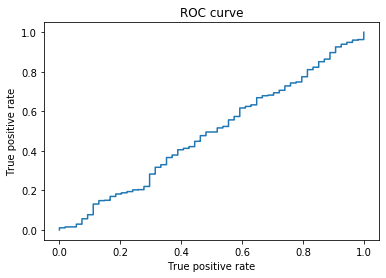

In [120]:
#We can plot the roc curve for k=5
ROC(y_test1, y_pred1)

In [186]:
# The model is less accurate but it makes more sense 

### Decision tree classifier for unbalanced data

In [121]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=20)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


Accuracy : 0.9644772117962467


array([[11701,   499],
       [   31,  2689]])

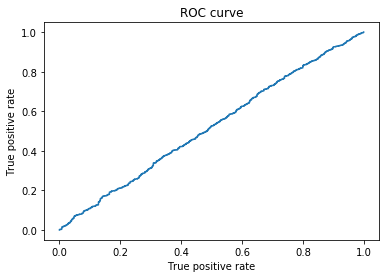

In [122]:
ROC(y_test, y_pred)

### ### Decision tree classifier for balanced data

In [123]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=20)
clf.fit(X_train1,y_train1)
y_predict1 = clf.predict(X_test1)
print("Accuracy :",metrics.accuracy_score(y_test1, y_predict1))
confusion_matrix(y_test1, y_predict1)

Accuracy : 1.0


array([[2593,    0],
       [   0,  898]])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


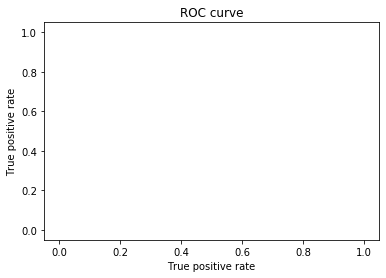

In [124]:
ROC(y_test1,y_predict1)

### Random forest with unbalanced data

In [125]:
clf = RandomForestClassifier(max_depth=30, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy : 1.0


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[12200,     0],
       [    0,  2720]])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


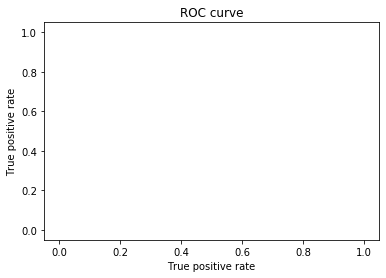

In [126]:
ROC(y_test, y_pred)

### Random forest with balanced data

In [127]:
clf = RandomForestClassifier(max_depth=30, random_state=0)
clf.fit(X_train1,y_train1)
y_predict1=clf.predict(X_test1)
print("Accuracy ",k, " :",metrics.accuracy_score(y_test1, y_predict1))
confusion_matrix(y_test1, y_predict1)

Accuracy  4  : 1.0


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[2593,    0],
       [   0,  898]])

In [132]:
ROC(y_test1,y_predict1)

IndexError: single positional indexer is out-of-bounds

### Bayes classifier

In [128]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.18230563002680966


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide


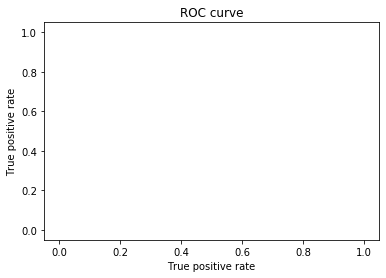

In [129]:
ROC(y_test, y_pred)

In [130]:
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)
y_pred = gnb.predict(X_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8948725293612145


### KNN

In [131]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(80,), random_state=1)
clf.fit(X_train,y_train)
y_predict1 = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict1))


Accuracy: 0.9999329758713137


### SVM